In [1]:
import ROOT as r

Welcome to JupyROOT 6.14/09


In [2]:
x = r.RooRealVar("x","M_{ee}",60,120, "GeV")

In [5]:
inputfile = r.TFile("data/et_vs_mass_DYSample_massrange50_300_datamc_bothHighR9.root", "READ")
inputfile.ls()

TFile**		data/et_vs_mass_DYSample_massrange50_300_datamc_bothHighR9.root	
 TFile*		data/et_vs_mass_DYSample_massrange50_300_datamc_bothHighR9.root	
  KEY: TH1F	Hist0_data;1	(Et1+Et2)_bin_50_to_60_GeV_for_data
  KEY: TH1F	Hist0_MC;1	(Et1+Et2)_bin_50_to_60_GeV_for_MC
  KEY: TH1F	Hist1_data;1	(Et1+Et2)_bin_60_to_70_GeV_for_data
  KEY: TH1F	Hist1_MC;1	(Et1+Et2)_bin_60_to_70_GeV_for_MC
  KEY: TH1F	Hist2_data;1	(Et1+Et2)_bin_70_to_75_GeV_for_data
  KEY: TH1F	Hist2_MC;1	(Et1+Et2)_bin_70_to_75_GeV_for_MC
  KEY: TH1F	Hist3_data;1	(Et1+Et2)_bin_75_to_80_GeV_for_data
  KEY: TH1F	Hist3_MC;1	(Et1+Et2)_bin_75_to_80_GeV_for_MC
  KEY: TH1F	Hist4_data;1	(Et1+Et2)_bin_80_to_85_GeV_for_data
  KEY: TH1F	Hist4_MC;1	(Et1+Et2)_bin_80_to_85_GeV_for_MC
  KEY: TH1F	Hist5_data;1	(Et1+Et2)_bin_85_to_90_GeV_for_data
  KEY: TH1F	Hist5_MC;1	(Et1+Et2)_bin_85_to_90_GeV_for_MC
  KEY: TH1F	Hist6_data;1	(Et1+Et2)_bin_90_to_95_GeV_for_data
  KEY: TH1F	Hist6_MC;1	(Et1+Et2)_bin_90_to_95_GeV_for_MC
  KEY: TH1F	Hist7_data;1	(

In [17]:
data_hist = inputfile.Get("Hist0_data");                                                             
MC_hist = inputfile.Get("Hist0_MC");                                                                 
#data_hist->Rebin(5);                                                                                      
#MC_hist->Rebin(5);                                                                                         
                                                                                                                
rdh_data = r.RooDataHist("rdh_data","", r.RooArgList(x), r.RooFit.Import(data_hist))                                         
rdh_MC = r.RooDataHist("rdh_MC","", r.RooArgList(x), r.RooFit.Import(MC_hist)) 
#ras_rdh_MC = r.RooArgSet(rdh_MC)
rdh_pdf = r.RooHistPdf("rdh_pdf", "", r.RooArgSet(x), rdh_MC );           

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(rdh_data): fit range of variable x expanded to nearest bin boundaries: [60,120] --> [60,120]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(rdh_MC): fit range of variable x expanded to nearest bin boundaries: [60,120] --> [60,120]


In [18]:
xframe = x.frame(r.RooFit.Title("Data Hist and Template Fit"))                                              
xframe2 = x.frame(r.RooFit.Title("MC Hist"))     
rdh_data.plotOn(xframe) ;                                                                                    
rdh_pdf.fitTo(rdh_data,r.RooFit.Extended())
rdh_pdf.plotOn(xframe) ;                                                                                     
rdh_MC.plotOn(xframe2);                                                    

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (rdh_pdf)
[#0] WARNING:Minization -- RooMinimizer::hesse: Error, run Migrad before Hesse!
[#1] INFO:Minization -- RooMinimizer::optimizeConst: deactivating const optimization
[#1] INFO:InputArguments -- RooAbsData::plotOn(rdh_MC) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors


Error in <ROOT::Math::Fitter::SetFCN>: FCN function has zero parameters 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Exercise05
Info in <TCanvas::Print>: png file plots/Exercise05.png has been created


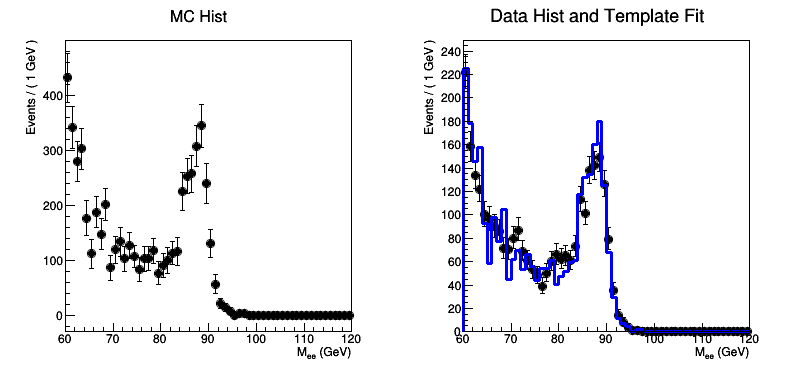

In [20]:
c = r.TCanvas("Exercise05","Exercise05",800,400) ;                                             
c.Divide(2) ;                                                                                                
c.cd(1) ; r.gPad.SetLeftMargin(0.15) ;  xframe.GetYaxis().SetTitleOffset(1.6) ; xframe2.Draw() ;           
c.cd(2) ; r.gPad.SetLeftMargin(0.15) ; xframe2.GetYaxis().SetTitleOffset(1.6) ; xframe.Draw() ;            
c.Draw()       
c.SaveAs("plots/Exercise05.png")